In [12]:
from shallowmind.src.model import ModelInterface
from shallowmind.src.data import DataInterface
from shallowmind.api.infer import prepare_inference
import pandas as pd
import torch
from tqdm import tqdm
import pickle
import pytorch_lightning as pl
pl.seed_everything(42)
# hand, d=2
# ckpt = '/data/xiaowjia/Friends_fNIRS/work_dir/CL-S2-Tf-d=2-nh=11bs=256-ls=0.00015-CL_way=pair-label=hand/ckpts/exp_name=CL-S2-Tf-d=2-nh=11bs=256-ls=0.00015-CL_way=pair-label=hand-cfg=fNIRS_Emo_tramsformer-CL_V0_step2-bs=256-seed=42-val_loss=0.2972.ckpt'
# config = '/data/xiaowjia/Friends_fNIRS/work_dir/CL-S2-Tf-d=2-nh=11bs=256-ls=0.00015-CL_way=pair-label=hand/fNIRS_Emo_tramsformer-CL_V0_step2.py'

# hand, d=4
# ckpt = '/data/xiaowjia/Friends_fNIRS/work_dir/CL-S2-Tf-d=4-nh=11bs=128-ls=0.00015-CL_way=pair-label=hand/ckpts/exp_name=CL-S2-Tf-d=4-nh=11bs=128-ls=0.00015-CL_way=pair-label=hand-cfg=fNIRS_Emo_tramsformer-CL_V0_step2-bs=128-seed=42-val_loss=0.2718.ckpt'
# config = '/data/xiaowjia/Friends_fNIRS/work_dir/CL-S2-Tf-d=4-nh=11bs=128-ls=0.00015-CL_way=pair-label=hand/fNIRS_Emo_tramsformer-CL_V0_step2.py'

# relationship, d=2
# ckpt = '/data/xiaowjia/Friends_fNIRS/work_dir/CL-S2-Tf-d=2-nh=11bs=128-ls=0.00015-CL_way=pair-label=relationship/ckpts/exp_name=CL-S2-Tf-d=2-nh=11bs=128-ls=0.00015-CL_way=pair-label=relationship-cfg=fNIRS_Emo_tramsformer-CL_V0_step2-bs=128-seed=42-val_loss=0.0696.ckpt'
# config = '/data/xiaowjia/Friends_fNIRS/work_dir/CL-S2-Tf-d=2-nh=11bs=128-ls=0.00015-CL_way=pair-label=relationship/fNIRS_Emo_tramsformer-CL_V0_step2.py'

# # relationship, 0.1, d=2
# ckpt ='/home/xiaowjia/data/Friends_fNIRS/work_dir/CL-S2-Tf-ts=0.1-d=2-nh=11bs=256-ls=0.00015-CL_way=pair-label=relationship/ckpts/exp_name=CL-S2-Tf-ts=0.1-d=2-nh=11bs=256-ls=0.00015-CL_way=pair-label=relationship-cfg=fNIRS_Emo_tramsformer-CL_V0_step2-bs=256-seed=42-val_loss=0.0082.ckpt'
# config = '/home/xiaowjia/data/Friends_fNIRS/work_dir/CL-S2-Tf-ts=0.1-d=2-nh=11bs=256-ls=0.00015-CL_way=pair-label=relationship/fNIRS_Emo_tramsformer-CL_V0_step2.py'

# hand, 0.1, d=2
# ckpt = '/data/xiaowjia/Friends_fNIRS/work_dir/CL-S2-Tf-ts=0.1-d=2-nh=11bs=256-ls=0.00015-CL_way=pair-label=hand/ckpts/exp_name=CL-S2-Tf-ts=0.1-d=2-nh=11bs=256-ls=0.00015-CL_way=pair-label=hand-cfg=fNIRS_Emo_tramsformer-CL_V0_step2-bs=256-seed=42-val_loss=0.0733.ckpt'
# config = '/home/xiaowjia/data/Friends_fNIRS/work_dir/CL-S2-Tf-ts=0.1-d=2-nh=11bs=256-ls=0.00015-CL_way=pair-label=hand/fNIRS_Emo_tramsformer-CL_V0_step2.py'

# AllData relationship, d=2
# ckpt = '/data/xiaowjia/Friends_fNIRS/work_dir/S2_AllData-Tf-ts=0.3-d=2-nh=11bs=128-ls=0.00015-label=relationship/ckpts/exp_name=S2_AllData-Tf-ts=0.3-d=2-nh=11bs=128-ls=0.00015-label=relationship-cfg=fNIRS_Emo_tramsformer-AllData_V0_step2-bs=128-seed=42-val_f1_score=0.8723.ckpt'
# config = '/home/xiaowjia/data/Friends_fNIRS/work_dir/S2_AllData-Tf-ts=0.3-d=2-nh=11bs=128-ls=0.00015-label=relationship/fNIRS_Emo_tramsformer-AllData_V0_step2.py'
ckpt = '/data/xiaowjia/Friends_fNIRS/work_dir/S2_AllData-FuzzyTf-r=3-ts=0.3-bs=128-ls=0.00015-label=relationship/ckpts/exp_name=S2_AllData-FuzzyTf-r=3-ts=0.3-bs=128-ls=0.00015-label=relationship-cfg=fNIRS_Emo_FuzzyTramsformer-AllData_V0_step2-XWJ-bs=128-seed=42-val_f1_score=0.9026.ckpt'
config = '/data/xiaowjia/Friends_fNIRS/work_dir/S2_AllData-FuzzyTf-r=3-ts=0.3-bs=128-ls=0.00015-label=relationship/fNIRS_Emo_FuzzyTramsformer-AllData_V0_step2-XWJ.py'

data_module, model = prepare_inference(config, ckpt)
data_module.setup()
test_loader = data_module.test_dataloader()
data_table = test_loader.dataset.data_table
model = model.eval()

Global seed set to 42


The pipeline is not setup, will use identity transform
The pipeline is not setup, will use identity transform
The pipeline is not setup, will use identity transform
The pipeline is not setup, will use identity transform


In [13]:
from tqdm import tqdm
device = torch.device('cuda:0')
model = model.to(device)
val_loader = data_module.val_dataloader()
data_table = val_loader.dataset.data_table
res = pd.DataFrame(columns=['pred', 'label'])
embs = []
data_info = test_loader.dataset.data_index_table
for batch_idx, d in tqdm(enumerate(test_loader), total=len(test_loader)):
    torch.cuda.empty_cache()
    data = {'seq': d[0]['seq'].to(device),}
    label = d[1].to(device)
    with torch.no_grad():
        imgs = model.model.gen_data(data)
        latent = model.model.forward_encoder(imgs)
        latent = torch.cat([latent[:latent.shape[0]//2, :], latent[latent.shape[0]//2:, :]], dim=1)
        embs.append(latent.cpu().numpy())
        latent = model.model.cls(latent)
        pred = latent.squeeze(1)
        pred = torch.argmax(pred, dim=1)
        pred = pred.cpu().numpy()
        label = label.cpu().numpy()
        res = pd.concat([res, pd.DataFrame({'pred': pred, 'label': label})], axis=0)


100%|██████████| 134/134 [00:05<00:00, 25.41it/s]


In [14]:
import numpy as np
data_info = data_info.reset_index(drop=True)
res = res.reset_index(drop=True)
res = pd.concat([data_info, res], axis=1)
embs = np.concatenate(embs, axis=0)

In [15]:
print(len(res), len(embs))

17028 17028


In [16]:
# acc, recall, precision, f1, auc_roc, auc_pr
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, average_precision_score
pred = res['pred'].values.astype(int)
label = res['label'].values.astype(int)
print(pred.shape, label.shape)
print(accuracy_score(label, pred), recall_score(label, pred), precision_score(label, pred), f1_score(label, pred), roc_auc_score(label, pred), average_precision_score(label, pred))


(17028,) (17028,)
0.8983439041578577 0.9141083132114523 0.8898589657488247 0.901820656797686 0.8979976207756937 0.8572963999526442


In [17]:
# calculate the accuracy for each condition{hand and emotion}
for hand in [1,2]:
    for emotion_label in [2,3]:
        rows = res[(res['hand']==hand) & (res['emotion_label']==emotion_label)]
        pred = rows['pred'].values.astype(int)
        label = rows['label'].values.astype(int)
        print(f'hand={hand}, emotion_label={emotion_label}',
              accuracy_score(label, pred), 
              recall_score(label, pred), 
              precision_score(label, pred), 
              f1_score(label, pred), 
              roc_auc_score(label, pred), 
              average_precision_score(label, pred))

hand=1, emotion_label=2 0.899554565701559 0.9076160432627309 0.8911504424778761 0.8993078812234874 0.899646859147878 0.8544794541438022
hand=1, emotion_label=3 0.9022556390977443 0.9345291479820628 0.8708733806936899 0.9015790612156609 0.9035532337848458 0.8452206830571399
hand=2, emotion_label=2 0.9012953367875648 0.9193069306930693 0.8949397590361445 0.9069597069597068 0.900414334911752 0.8649523023093245
hand=2, emotion_label=3 0.889634601043997 0.8954219030520646 0.9043517679057117 0.8998646820027063 0.8889365782669792 0.867693358426696


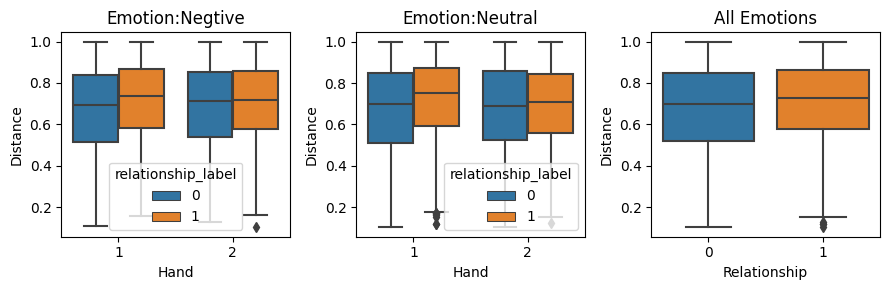

In [28]:
# Embedding visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from minepy import MINE
mine = MINE(alpha=0.6, c=15, est="mic_approx")

def distance(emb, metric='euclidean'):
    x = emb[emb.shape[0]//2:]
    y = emb[:emb.shape[0]//2]
    # normalize
    x = x/np.linalg.norm(x)
    y = y/np.linalg.norm(y)

    if metric == 'euclidean':
        return np.sqrt(np.sum((x-y)**2))
    elif metric == 'cosine':
        return 1 - np.abs(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))
    elif metric == 'manhattan':
        return np.sum(np.abs(x-y))
    elif metric == 'corr':
        return 1-np.corrcoef(x,y)[0,1]
    elif metric == 'mi':
        mine.compute_score(x,y)
        return  mine.mic()

metric = 'cosine'
emb_dict = [distance(embs[i],metric = metric) for i in range(len(embs))]

# compare the distance between relationship and hand
res['emb'] = emb_dict

plt.figure(figsize=(9,3))
ax = plt.subplot(1,3,1)
sns.boxplot(x='hand', y='emb', hue='relationship_label', data=res.loc[res['emotion_label']==2], ax=ax)
plt.title(f'Emotion:Negtive')
ax.set_xlabel('Hand')
ax.set_ylabel('Distance')
ax = plt.subplot(1,3,2)
sns.boxplot(x='hand', y='emb', hue='relationship_label', data=res.loc[res['emotion_label']==3], ax=ax)
plt.title(f'Emotion:Neutral')
ax.set_xlabel('Hand')
ax.set_ylabel('Distance')
ax = plt.subplot(1,3,3)
sns.boxplot(x='relationship_label', y='emb', data=res, ax=ax)
plt.title(f'All Emotions')
ax.set_xlabel('Relationship')
ax.set_ylabel('Distance')
plt.tight_layout()
plt.show()

In [10]:
res.to_csv('res_relationship_d=2-fuzzytransformer-cosine.csv', index=False)

In [29]:
import pingouin as pg
res['subj'] = res['pair_idx'].apply(lambda x: ''.join(x.split('-')[1:]))
print('T-test: Relationship',pg.ttest(res.loc[res['relationship_label']==1, 'emb'], res.loc[res['relationship_label']==0, 'emb'], paired=False))
print('ANOVA')
print(pg.mixed_anova(dv='emb', within='hand', between='relationship_label', subject='subj', data=res))

T-test: Relationship                 T           dof alternative         p-val         CI95%  \
T-test  10.640531  16725.085855   two-sided  2.343780e-26  [0.03, 0.04]   

         cohen-d       BF10  power  
T-test  0.163442  5.261e+22    1.0  
ANOVA
               Source        SS  DF1  DF2        MS         F     p-unc  \
0  relationship_label  0.062385    1   38  0.062385  2.614451  0.114167   
1                hand  0.003057    1   38  0.003057  0.936588  0.339276   
2         Interaction  0.000033    1   38  0.000033  0.010256  0.919868   

        np2  eps  
0  0.064372  NaN  
1  0.024054  1.0  
2  0.000270  NaN  


In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import os
save_dir = '../output'
os.makedirs(save_dir, exist_ok=True)
# umap
print(embs.shape)
for seed in range(100):
    for n_c in range(2,21):
        for n_n in range(5, 51, 5):
            reducer = umap.UMAP(random_state=1,n_components=n_c, n_neighbors=n_n)
            embedding = reducer.fit_transform(embs)
            plt.figure(figsize=(3,3))
            plt.scatter(embedding[:, 0], embedding[:, 1], c=res['emotion_label'].values, cmap='Spectral', s=1)
            plt.gca().set_aspect('equal', 'datalim')
            plt.savefig(f'{save_dir}/umap_{n_c}_{n_n}.png')
            plt.close()




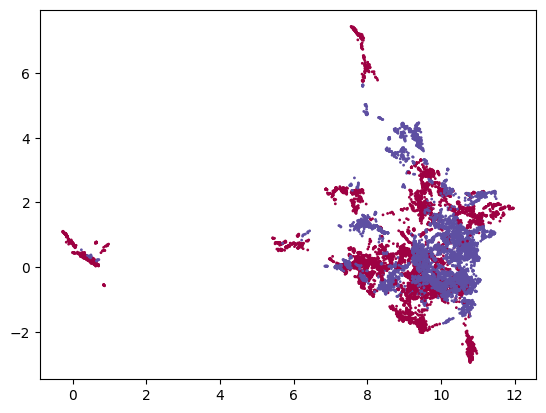

In [10]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=res['relationship_label'].values, cmap='Spectral', s=1)
